In [ ]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            # library for visualization
import random                              # pseudo-random number generator

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
all_positive_tweets=twitter_samples.strings('positive_tweets.json')
all_negative_tweets=twitter_samples.strings('negative_tweets.json')
print(len(all_negative_tweets))
print(len(all_negative_tweets))

print(type(all_positive_tweets))
print(type(all_negative_tweets))

5000
5000
<class 'list'>
<class 'list'>


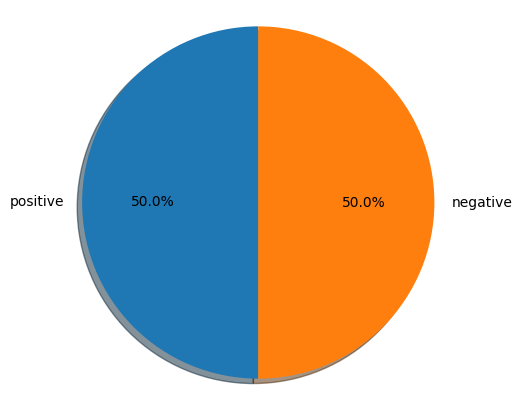

In [ ]:
fig=plt.figure(figsize=(5,5))
labels='positive','negative'

sizes=[len(all_positive_tweets),len(all_negative_tweets)]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')

plt.show()


In [ ]:
print('\033[92m'+ all_positive_tweets[random.randint(0,5000)])
print('\033[91m'+ all_negative_tweets[random.randint(0,5000)])

you have changed so many lives too :) We love you so much! Best idols on the planet ♥  https://t.co/TmbsVgkBGw
My computer has broken and i have to wait until to fix it.i miss so much the twitter and you,guys.All my love..:(


In [ ]:
tweet=all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

In [ ]:
print('\033[92m' + tweet)
print('\033[94m')

tweet2 = re.sub(r'^RT[\s]+', '',tweet)# remove old style retweet text "RT"
tweet2 = re.sub(r'https?://[^\s\n\r]+', '', tweet2)# remove hyperlinks
tweet2 = re.sub(r'#', '', tweet2)# remove hashtags # only removing the hash # sign from the word

print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [ ]:
print()
print('\033[92m' + tweet2)
print('\033[94m')

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)

tweet_tokens= tokenizer.tokenize(tweet2)

print(tweet_tokens)


My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [ ]:
stopwords_english=stopwords.words('english')
print(stopwords_english)

print(string.punctuation)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
print()
#green
print('\033[92m')
print(tweet_tokens)
#blue
print('\033[94m')

tweets_clean=[]

for word in tweet_tokens:
  if (word not in stopwords_english) and (word not in string.punctuation):
    tweets_clean.append(word)

print(tweets_clean)



['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


In [ ]:
print()
print('\033[92m')
print(tweets_clean)
print('\033[94m')

stemmer=PorterStemmer()

tweets_stem = []

for word in tweets_clean:
  word_stem=stemmer.stem(word)
  tweets_stem.append(word_stem)

print(tweets_stem)



['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [ ]:
!pip install utils

In [ ]:
def process_tweet(tweet):
 stemmer=PorterStemmer()
 stopwords_english = stopwords.words('english')
 tweet = re.sub(r'\$\w*', '', tweet)
 tweet = re.sub(r'^RT[\s]+', '', tweet)
 tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
 tweet = re.sub(r'#', '', tweet)
 tokenizer = TweetTokenizer(preserve_case=False,        strip_handles=True,reduce_len=True)
 tweet_tokens = tokenizer.tokenize(tweet)

 tweets_clean = []
 for word in tweet_tokens:
    if (word not in stopwords_english and
            word not in string.punctuation):
        stem_word = stemmer.stem(word)  # stemming word
        tweets_clean.append(stem_word)

 return tweets_clean

In [ ]:


tweet = all_positive_tweets[2277]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

tweet_stem = process_tweet(tweet)

print(tweet_stem)



My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i

['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']
